<a href="https://colab.research.google.com/github/Near-o7/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

Se extraen los datos desde la URL proporcionada (en formato JSON) y se almacenan en un DataFrame

In [190]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Se observa que algunas columnas contienen registros anidados en forma de diccionarios, por lo que es necesario normalizar los datos. Este proceso se abordará en la sección '🔧 Transformación'.

#🔧 Transformación

## Identificando el tipo de datos

In [191]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


Se observa que las el tipo de datos de las columnas se representa como objeto. Luego de normalizar correctamente los datos este aspecto deberá ser abordado.

## Diccionario de datos

A continuación se presenta un diccionario de datos del conjunto de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

## Identificando columnas

A priori, podemos identificar algunas columnas clave para nuestro análisis, basándonos en el análisis exploratorio inicial y el diccionario de datos. Entre las más relevantes se encuentran:

- **Churn**: Indica si un cliente ha abandonado la empresa o no.
- **PaymentMethod**: Podría ayudarnos a detectar si existe una relación entre el método de pago y la propensión a la evasión.
- **Tenure**: Refleja la antigüedad de los clientes, lo que podría ser útil para entender su lealtad.
- **Charges.Monthly y Charges.Total**: Permiten evaluar si existe una relación entre el monto cobrado a los clientes y la probabilidad de evasión.

Existen otras columnas de interés que analizaremos con mayor detalle en las siguientes secciones.


## Transformando y limpiando datos

In [192]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account_normalized = pd.json_normalize(df['account'])

df_final = pd.concat([
    df[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account_normalized
], axis=1)

df_final.head()



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [193]:
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
    'PaymentMethod', 'Churn'
]

for col in categorical_cols:
    if col in df_final.columns:
        print(f"Valores únicos en '{col}': {df_final[col].unique()}")
        print(f"Conteo de valores en '{col}':\n{df_final[col].value_counts()}\n")
        print(f"Total de valores en '{col}': {df_final[col].value_counts().sum()}\n")

Valores únicos en 'gender': ['Female' 'Male']
Conteo de valores en 'gender':
gender
Male      3675
Female    3592
Name: count, dtype: int64

Total de valores en 'gender': 7267

Valores únicos en 'Partner': ['Yes' 'No']
Conteo de valores en 'Partner':
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Total de valores en 'Partner': 7267

Valores únicos en 'Dependents': ['Yes' 'No']
Conteo de valores en 'Dependents':
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Total de valores en 'Dependents': 7267

Valores únicos en 'PhoneService': ['Yes' 'No']
Conteo de valores en 'PhoneService':
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Total de valores en 'PhoneService': 7267

Valores únicos en 'MultipleLines': ['No' 'Yes' 'No phone service']
Conteo de valores en 'MultipleLines':
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Total de valores en 'MultipleLines': 7267

Valores únicos en

In [194]:
import numpy as np

df_final.replace(r'^\s*$', np.nan, regex=True, inplace=True)

print("\nVerificando valores nulos (incluyendo strings vacíos):")
print(df_final.isnull().sum())  # Conteo de nulos por columna
print((df_final.isnull().sum() / len(df_final)) * 100)  # Porcentaje de nulos


Verificando valores nulos (incluyendo strings vacíos):
customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64
customerID          0.000000
Churn               3.082427
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0

Se observa que la columna Churn contiene valores vacíos. De un total de 7,267 registros, 224 presentan valores faltantes, lo que representa aproximadamente un 3%. En consecuencia, se procederá a eliminar estas filas con valores nulos en Churn del DataFrame. Tambien se observan 11 valores vacios para Charges.Total, aún no esta clara la causa de estos valores, por lo que de momento no se borrarán

In [195]:
df_final = df_final.dropna(subset=['Churn'])
print("\nVerificando valores nulos (incluyendo strings vacíos):")
print(df_final.isnull().sum())  # Conteo de nulos por columna
print((df_final.isnull().sum() / len(df_final)) * 100)  # Porcentaje de nulos


Verificando valores nulos (incluyendo strings vacíos):
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64
customerID          0.000000
Churn               0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovi

In [196]:
total_rows = df_final.shape[0]
print(f"Número total de filas en df_final: {total_rows}")

unique_customer_ids = df_final['customerID'].nunique()
print(f"Número de customerID únicos: {unique_customer_ids}")

if total_rows > unique_customer_ids:
    print("\n¡ADVERTENCIA: Hay customerID duplicados en el DataFrame!")
else:
    print("\nTodos los customerID son únicos. ¡No hay duplicados en esta columna!")

Número total de filas en df_final: 7043
Número de customerID únicos: 7043

Todos los customerID son únicos. ¡No hay duplicados en esta columna!


In [197]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Con los datos limpios, se procede a crear la columna de Cuentas diarias a partir de Charges.Monthly. Para ello, se divide el valor mensual entre 30, obteniendo así una estimación del cargo diario. Con el fin de mantener la consistencia en el conjunto de datos, la nueva columna se nombra en inglés como Charges.daily.

In [198]:
df_final.loc[:, 'Charges.daily'] = df_final['Charges.Monthly'] / 30
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


##Estandarización y transformación de datos

Se procede a revisar el tipo de datos de cada columna y a definirlos correctamente

In [199]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [200]:
# Convertir customerID a string
df_final['customerID'] = df_final['customerID'].astype(str)

# Columnas categóricas
categorical_columns = [
    'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]
df_final[categorical_columns] = df_final[categorical_columns].astype('category')

# Limpiar y convertir Charges.Total a float
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

In [201]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   Churn             7043 non-null   object  
 2   gender            7043 non-null   category
 3   SeniorCitizen     7043 non-null   int64   
 4   Partner           7043 non-null   object  
 5   Dependents        7043 non-null   object  
 6   tenure            7043 non-null   int64   
 7   PhoneService      7043 non-null   object  
 8   MultipleLines     7043 non-null   category
 9   InternetService   7043 non-null   category
 10  OnlineSecurity    7043 non-null   category
 11  OnlineBackup      7043 non-null   category
 12  DeviceProtection  7043 non-null   category
 13  TechSupport       7043 non-null   category
 14  StreamingTV       7043 non-null   category
 15  StreamingMovies   7043 non-null   category
 16  Contract          7043 non-nu

Con los tipos de datos ya definidos, ahora se estandarizarán las columnas con opciones Yes o No a binarias.

In [202]:
binary_map = {'Yes': 1, 'No': 0}

binary_columns = [
    'Churn',
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling'
]

df_final[binary_columns] = df_final[binary_columns].apply(lambda col: col.map(binary_map).fillna(col))
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.daily
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

##Análisis Descriptivo

In [203]:
df_final.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Charges.daily
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


###Análisis de las variables:

Para todos las varialbes se observa un valor de conteo de 7043, lo que representearía la cantidad de filas en nuestro dataframe. Analisando en detalle cada una se observa:

####Churn
Con una media de 0.265, esta variable binaria (0 para no churn, 1 para churn) sugiere que aproximadamente el 26.5% de los clientes ha abandonado la empresa.

###SeniorCitizen
La media de 0.162 revela que alrededor del 16.2% de los clientes son personas mayores (65 años o más).

###Partner y Dependents
La media de Partner es 0.483 y la de Dependents es 0.299. Esto significa que casi la mitad de los clientes tienen pareja, mientras que un tercio tiene dependientes. Estas variables son relevantes para entender la estructura familiar de los clientes y cómo esto podría influir en su permanencia.

###tenure
Con una media de 32.37 meses y una desviación estándar de 24.56, se observa una amplia dispersión en la antigüedad de los clientes. El 25% de los clientes tiene 9 meses o menos, mientras que el 75% supera los 55 meses, lo que sugiere una mezcla de clientes nuevos y leales.

###PhoneService y PaperlessBilling
La media de PhoneService es 0.903, indicando que la gran mayoría (90.3%) de los clientes tiene servicio telefónico. Por otro lado, la media de PaperlessBilling es 0.592, lo que significa que el 59.2% de los clientes prefiere recibir sus facturas en línea.

###Charges.Monthly
Con una media de 64.76 y una desviación estándar de 30.09, los cargos mensuales muestran una variabilidad considerable. El rango va desde 18.25 hasta 118.75, sugiriendo diferentes niveles de consumo o planes de servicio entre los clientes.

###Charges.Total
La media de 2283.30 y una desviación estándar de 2266.77 reflejan la gran dispersión en el gasto total acumulado por los clientes. Como se mencionó anteniormente, es notorio que hay 11 valores nulos, lo que podría indicar la necesidad de un tratamiento de datos faltantes.

###Charges.daily
Como es una variable calculada a partir de Charges.Monthly, siguie el mismo patron.


##Gráficos

### Proporciones

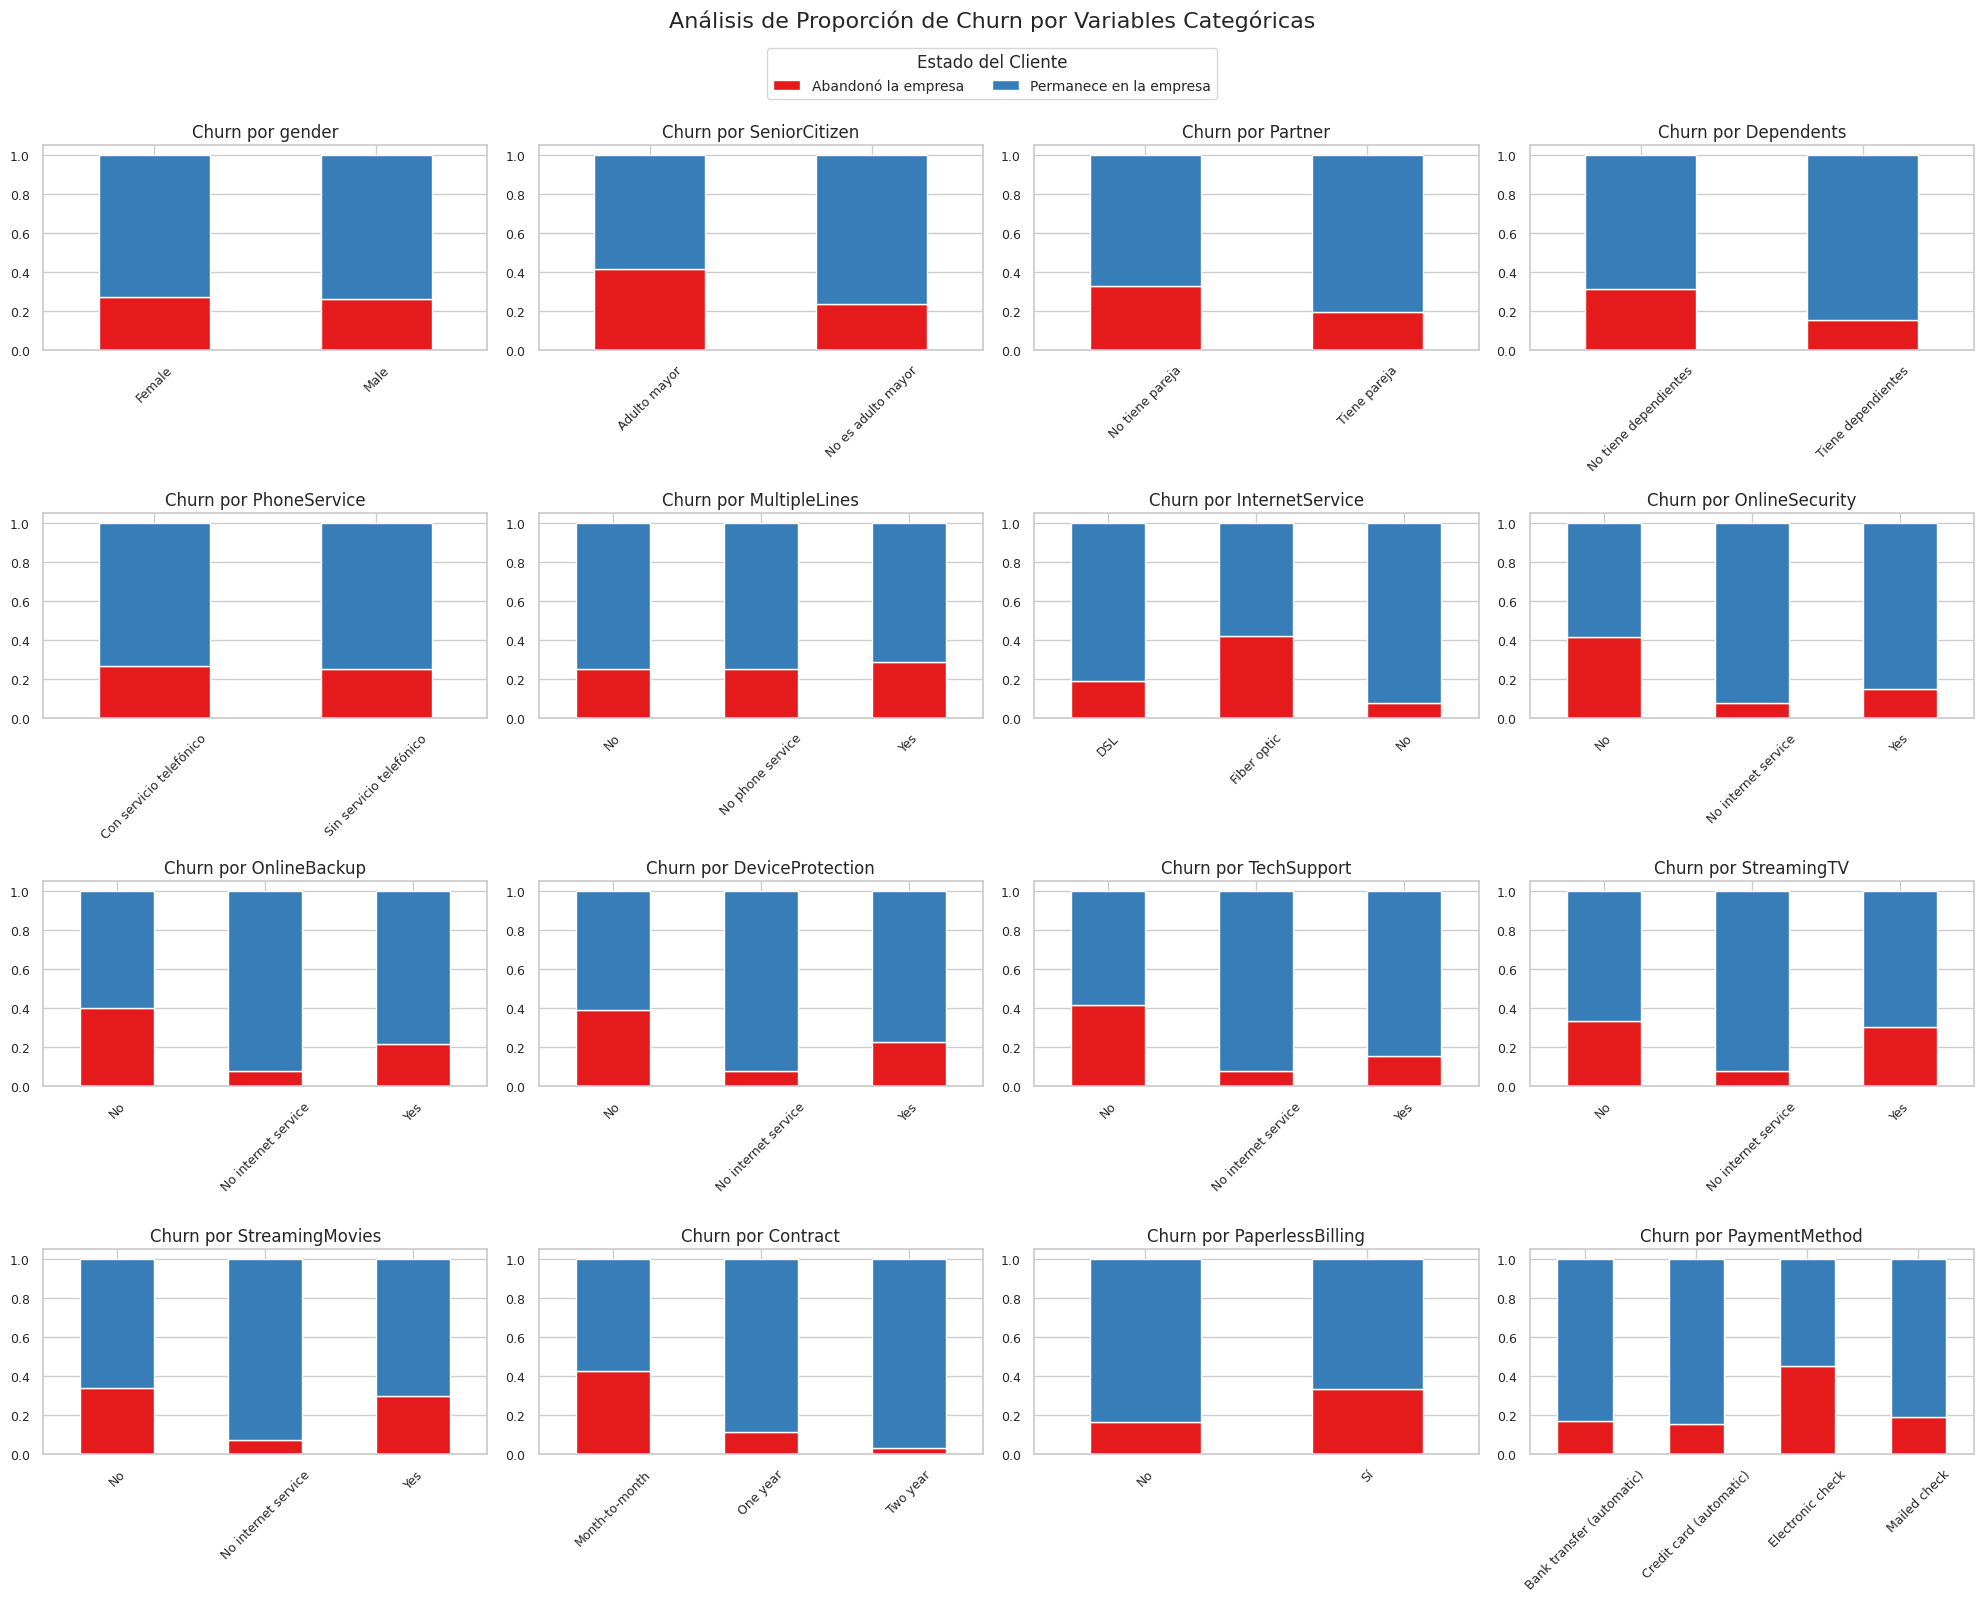

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

df_final['Churn'] = df_final['Churn'].map({0: 'Permanece en la empresa', 1: 'Abandonó la empresa'})

categorical_vars = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

mapeos = {
    'SeniorCitizen': {0: 'No es adulto mayor', 1: 'Adulto mayor'},
    'Partner': {0: 'No tiene pareja', 1: 'Tiene pareja'},
    'Dependents': {0: 'No tiene dependientes', 1: 'Tiene dependientes'},
    'PhoneService': {0: 'Sin servicio telefónico', 1: 'Con servicio telefónico'},

    'PaperlessBilling': {0: 'No', 1: 'Sí'}
}

df_graficos = df_final

for col, mapping_dict in mapeos.items():
    if col in df_graficos.columns:
        df_graficos[col] = df_graficos[col].map(mapping_dict)

sns.set_theme(style="whitegrid", palette="Set1")

num_plots = len(categorical_vars)
ncols = 4
nrows = (num_plots + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4))
axes = axes.flatten()

handles = []
labels = []
legend_added = False

for i, col in enumerate(categorical_vars):
    ax = axes[i]

    churn_proportions = df_graficos.groupby(col, observed=False)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_proportions.plot(kind='bar', stacked=True, ax=ax)

    ax.set_title(f'Churn por {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('', fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

    if not legend_added:
        handles, labels = ax.get_legend_handles_labels()
        legend_added = True

    ax.get_legend().remove()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.legend(handles, labels, title='Estado del Cliente',
           loc='upper center',
           bbox_to_anchor=(0.5, 0.98),
           ncol=2,
           fontsize=10,
           title_fontsize=12,
           frameon=True
          )

plt.tight_layout(rect=[0, 0, 1, 0.94])
fig.suptitle('Análisis de Proporción de Churn por Variables Categóricas', fontsize=16, y=1.0)
plt.show()



####Resumen General:
Los gráficos revelan que el churn no es un problema uniforme, sino que está influenciado de manera heterogénea por diversas características de los clientes y sus servicios.

Los factores más críticos que impulsan que los clientes abandonen la empresa (churn) parecen ser:

* **Tipo de Contrato**: Los contratos mes a mes son el mayor riesgo.
* **Servicio de Internet**: La fibra óptica parece ser un punto débil.
* **Cliente Adulto Mayor**: Este segmento requiere atención especial.
* **Falta de Servicios Adicionales**: La ausencia de seguridad, respaldo, protección de dispositivos y soporte técnico, así como servicios de streaming, se correlaciona con mayor churn.
* **Método de Pago**: El cheque electrónico es un indicador de riesgo.
* **Estructura Familiar**: Clientes sin pareja o sin dependientes tienen mayor propensión a irse.

### Recuento de evasión por variables categóricas

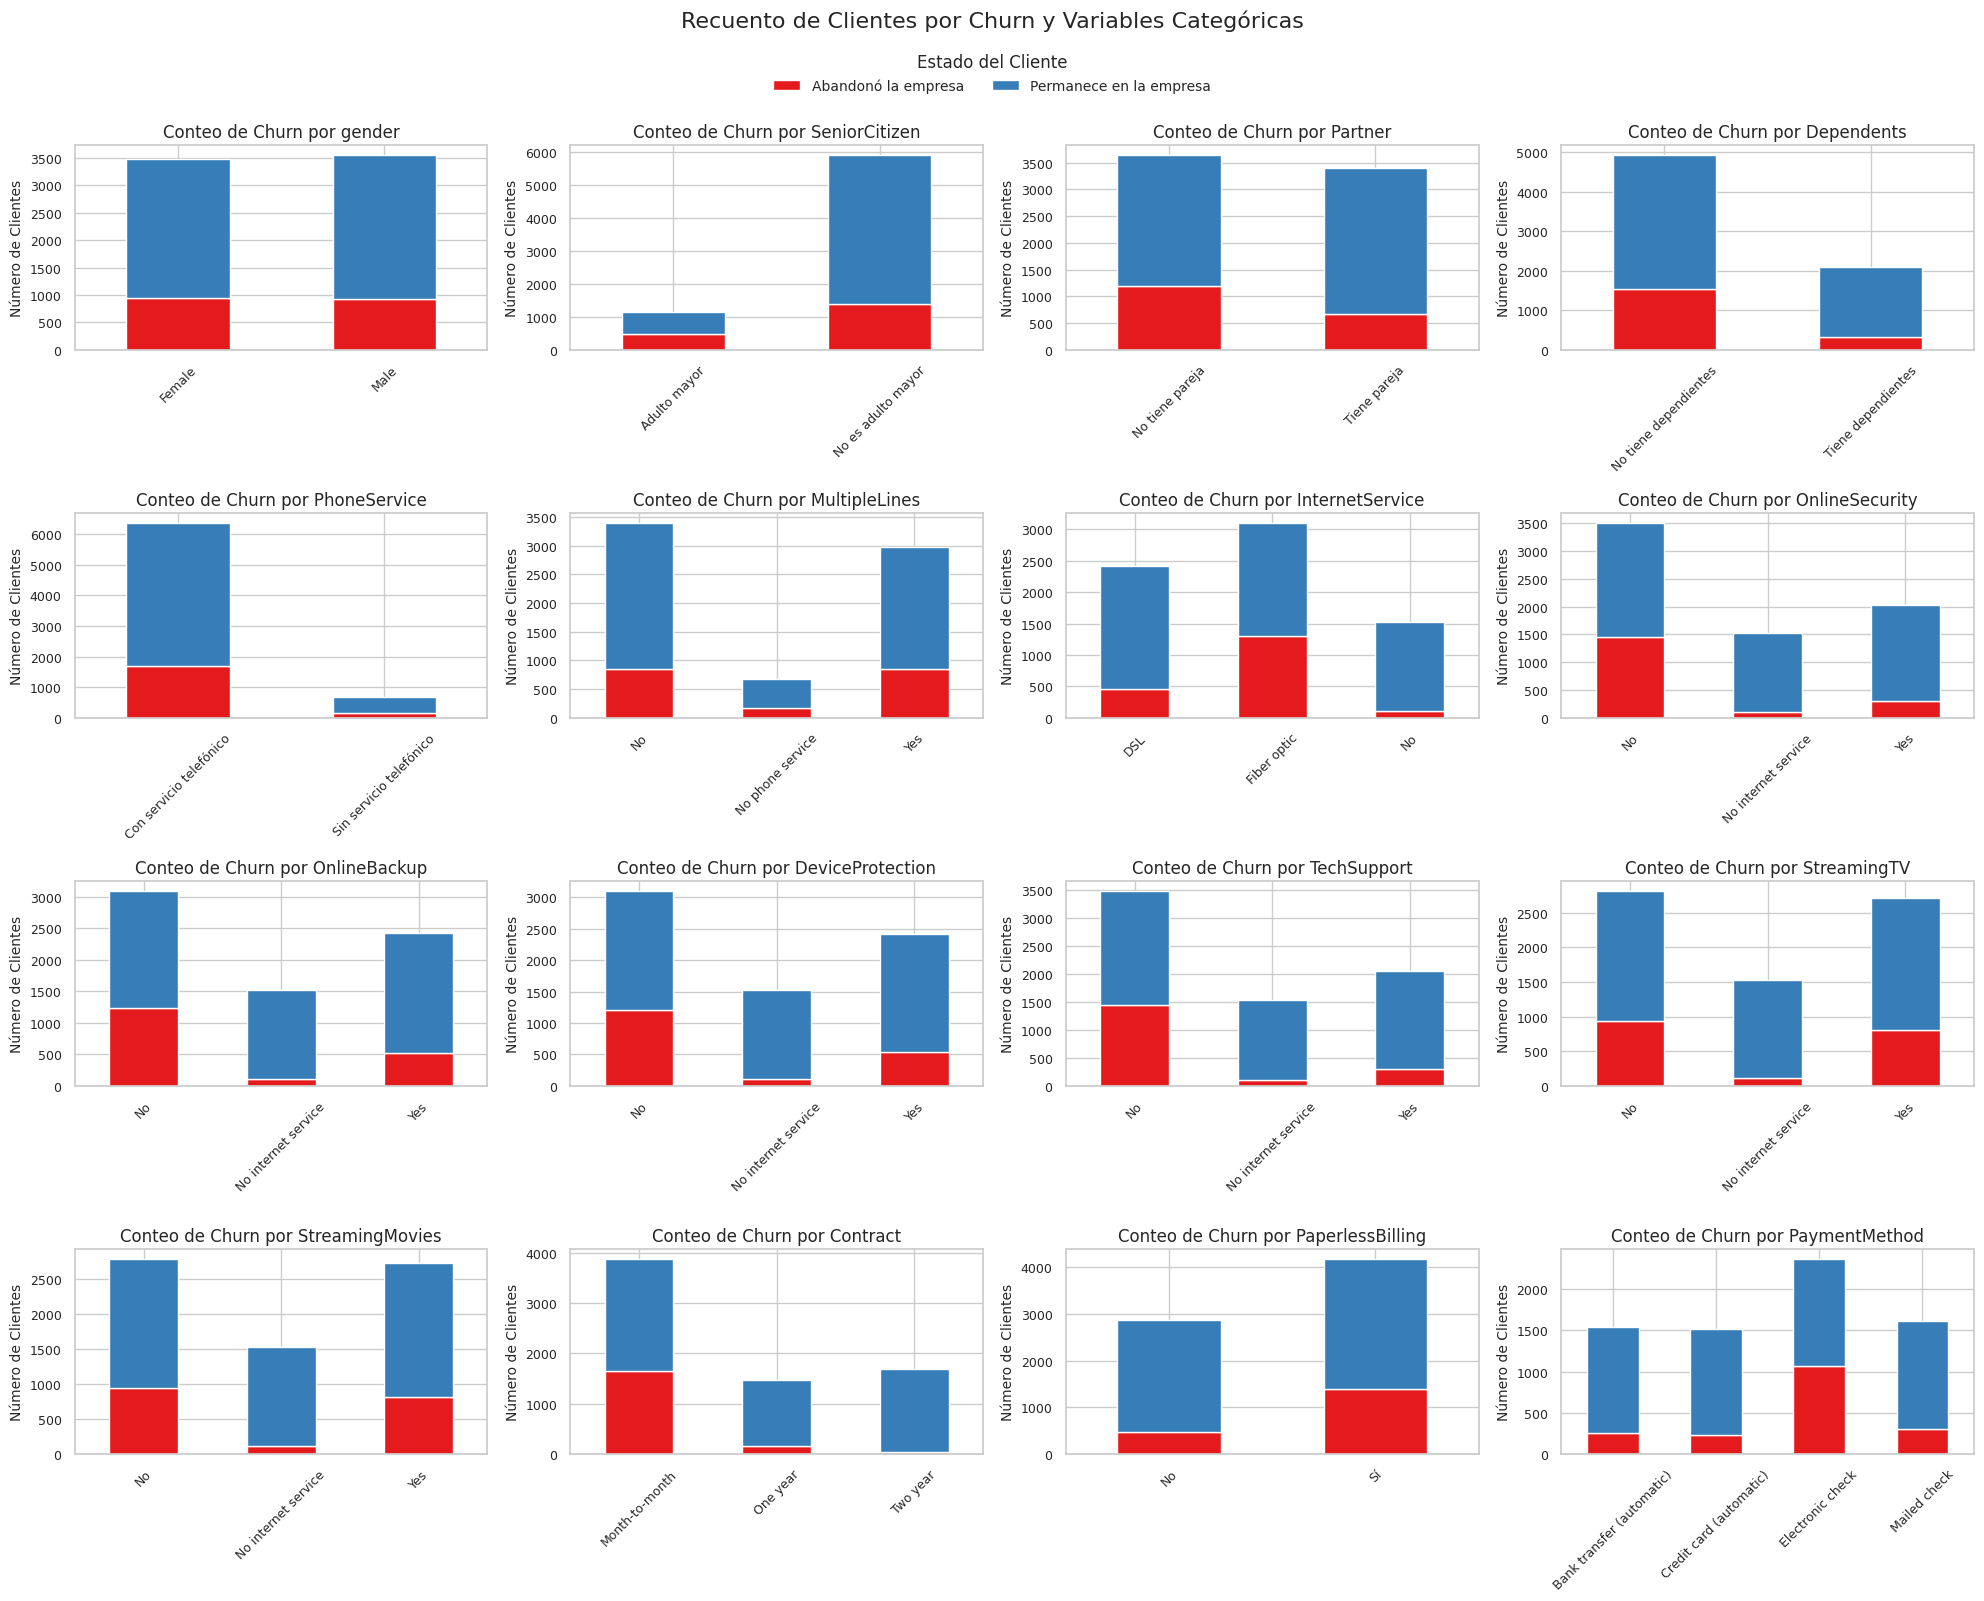

In [205]:
sns.set_theme(style="whitegrid", palette="Set1")

num_plots = len(categorical_vars)
ncols = 4
nrows = (num_plots + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4))
axes = axes.flatten()

handles = []
labels = []
legend_captured = False

for i, col in enumerate(categorical_vars):
    ax = axes[i]
    churn_counts = df_graficos.groupby(col, observed=False)['Churn'].value_counts().unstack().fillna(0)

    if 'Abandonó la empresa' not in churn_counts.columns:
        churn_counts['Abandonó la empresa'] = 0
    if 'Permanece en la empresa' not in churn_counts.columns:
        churn_counts['Permanece en la empresa'] = 0

    order_columns = ['Abandonó la empresa', 'Permanece en la empresa']
    final_order = [c for c in order_columns if c in churn_counts.columns]
    churn_counts = churn_counts[final_order]

    churn_counts.plot(kind='bar', stacked=True, ax=ax)

    ax.set_title(f'Conteo de Churn por {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Número de Clientes', fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

    if not legend_captured:
        handles, labels = ax.get_legend_handles_labels()
        legend_captured = True

    ax.get_legend().remove()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.legend(handles, labels, title='Estado del Cliente',
           loc='upper center',
           bbox_to_anchor=(0.5, 0.98),
           ncol=2,
           fontsize=10,
           title_fontsize=12,
           frameon=False
          )

plt.tight_layout(rect=[0, 0, 1, 0.94])
fig.suptitle('Recuento de Clientes por Churn y Variables Categóricas', fontsize=16, y=1.0)
plt.show()

#### Resúmen general
Los gráficos de conteo reafirman y amplifican las conclusiones de los gráficos de proporciones, destacando dónde se concentra la mayor cantidad de clientes que abandonan. ELa evasión es un problema heterogéneo con focos claros de alto volumen.

Los factores más críticos que impulsan que los clientes abandonen la empresa (churn) en grandes números absolutos parecen ser:

* **Tipo de Contrato**: Los contratos mes a mes son, sin duda, el mayor riesgo y la principal fuente de churn en términos de volumen.
* **Servicio de Internet**: La Fibra Óptica es un punto débil no solo en proporción sino en la cantidad de clientes afectados.
* **Falta de Servicios Adicionales (Seguridad, Respaldo, Protección, Soporte, Streaming)**: Estos son segmentos con gran volumen de clientes, y su ausencia conduce a un alto número de abandonos.
* **Método de Pago**: El Cheque Electrónico es un indicador de riesgo de churn para un gran grupo de clientes.
* **Estructura Familiar**: Clientes sin pareja o sin dependientes son grupos numerosos con un alto conteo de churn.

###Conteo de evasión por variables numéricas

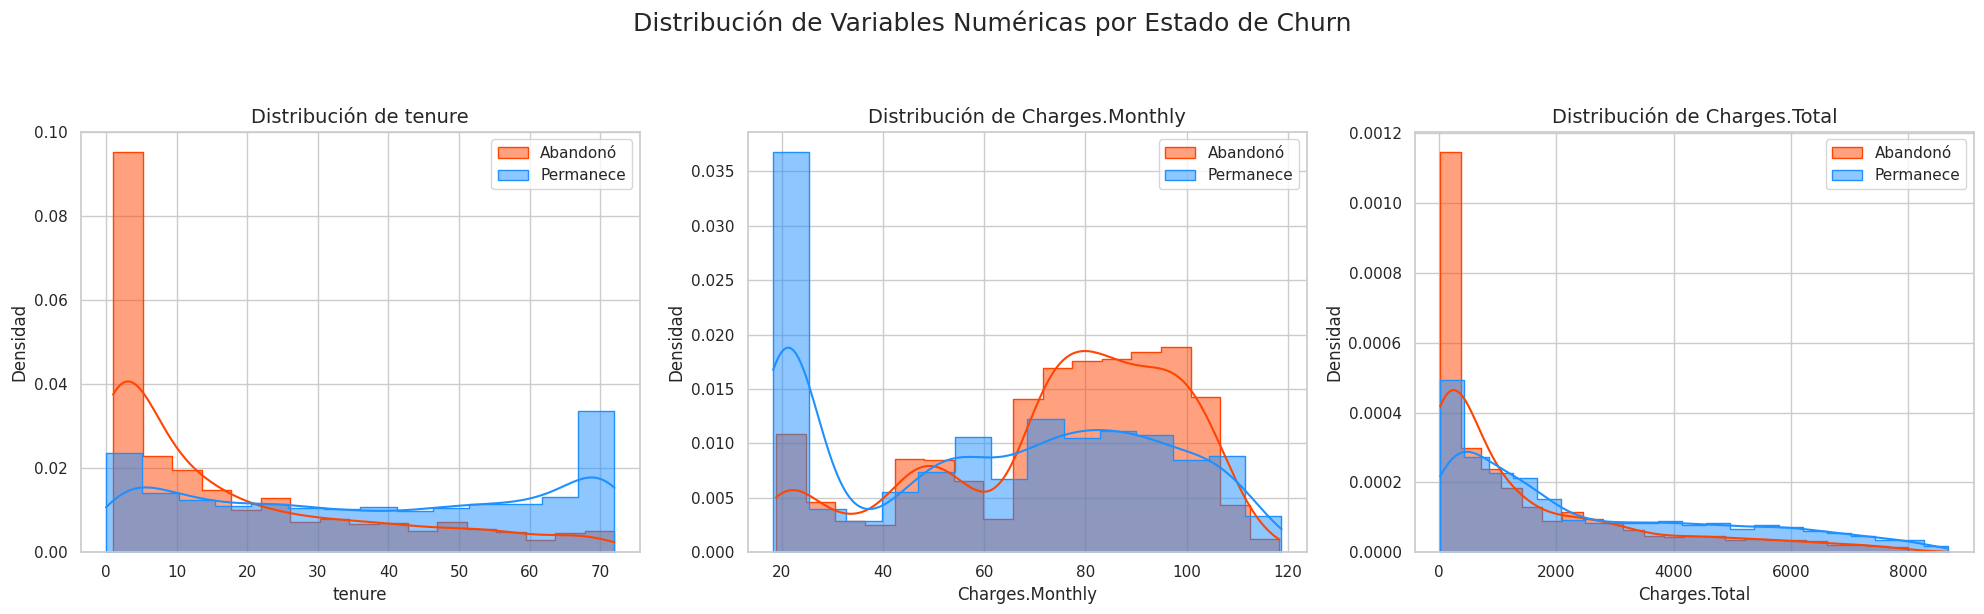

In [206]:
numerical_vars = ['tenure', 'Charges.Monthly', 'Charges.Total']

df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(df_final['Charges.Total'].median())

sns.set_theme(style="whitegrid", palette="viridis")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))


fig.suptitle('Distribución de Variables Numéricas por Estado de Churn', fontsize=18, y=1.02)

for i, col in enumerate(numerical_vars):
    ax = axes[i]

    sns.histplot(data=df_final[df_final['Churn'] == 'Abandonó la empresa'], x=col, kde=True,
                 label='Abandonó', color='orangered', ax=ax, element="step", stat="density", common_norm=False)

    sns.histplot(data=df_final[df_final['Churn'] == 'Permanece en la empresa'], x=col, kde=True,
                 label='Permanece', color='dodgerblue', ax=ax, element="step", stat="density", common_norm=False)

    ax.set_title(f'Distribución de {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Densidad', fontsize=12)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

####Resumen General:
El análisis de las variables numéricas refuerza de manera contundente los hallazgos del análisis de proporciones. Se dibuja un perfil muy claro del cliente propenso a la evasión: son clientes relativamente nuevos, que pagan una tarifa mensual elevada, y que, en consecuencia, abandonan la empresa antes de haber acumulado un gasto total significativo. Esto sugiere que la experiencia inicial del cliente y la percepción del valor por el costo son absolutamente cruciales para la retención.

Los factores numéricos más críticos que impulsan el churn son:

* **Antigüedad del Cliente (Tenure):** El Período Crítico.
El gráfico de tenure es el más revelador. La distribución de los clientes que abandonaron está masivamente concentrada en los primeros meses de servicio (un pico enorme cerca de tenure = 0). En contraste, los clientes que permanecen muestran una distribución mucho más uniforme y con un pico significativo en la antigüedad más alta (más de 70 meses).

* **Cargos Mensuales (Charges.Monthly):** La Sensibilidad al Precio.
Los clientes que abandonaron tienden a tener cargos mensuales más altos. Su distribución tiene un pico claro entre los 70 y 100. Por otro lado, la mayor concentración de clientes que permanecen se encuentra en el extremo inferior de los cargos mensuales (alrededor de 20).

* **Cargos Totales (Charges.Total):** La Evidencia del Abandono Temprano.
A primera vista, podría parecer contradictorio que los clientes que abandonaron tengan cargos totales significativamente más bajos. Sin embargo, esto confirma y refuerza las dos conclusiones anteriores. La distribución de cargos totales para la evación está fuertemente sesgada hacia valores muy bajos. Los clientes no se van porque hayan gastado poco; al contrario, su gasto total es bajo porque se van muy pronto.

#📄Informe final